In [1]:
from pyforest import *

In [2]:
df=pd.read_csv('modeldata.csv')

<IPython.core.display.Javascript object>

In [3]:
df.head()

,Unnamed: 0,age,time_in_hospital,race_AfricanAmerican,gender_Male,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,readmitted
0,0,0.0,1.0,0.0,0.0,41,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,1,10.0,3.0,0.0,0.0,59,0,18,0,0,...,1,0,0,0,0,0,0,0,1,0
2,2,20.0,2.0,1.0,0.0,11,5,13,2,0,...,1,0,0,0,0,0,0,1,1,0
3,3,30.0,2.0,0.0,1.0,44,1,16,0,0,...,1,0,0,0,0,0,0,0,1,0
4,4,40.0,1.0,0.0,1.0,51,0,8,0,0,...,1,0,0,0,0,0,0,0,1,0


In [4]:
df.drop('Unnamed: 0',1,inplace=True)

In [6]:
df.head()

,age,time_in_hospital,race_AfricanAmerican,gender_Male,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,readmitted
0,0.0,1.0,0.0,0.0,41,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,10.0,3.0,0.0,0.0,59,0,18,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,20.0,2.0,1.0,0.0,11,5,13,2,0,1,...,1,0,0,0,0,0,0,1,1,0
3,30.0,2.0,0.0,1.0,44,1,16,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,40.0,1.0,0.0,1.0,51,0,8,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [7]:
df1=pd.read_csv('diabetic_data.csv')

<IPython.core.display.Javascript object>

In [8]:
df1.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [13]:
df2=df1[['race']]

In [16]:
df3=pd.get_dummies(data=df2,drop_first=True)

<IPython.core.display.Javascript object>

In [18]:
df.drop('race_AfricanAmerican',1,inplace=True)

In [19]:
df.columns

Index(['age', 'time_in_hospital', 'gender_Male', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum_>300', 'max_glu_serum_None',
       'max_glu_serum_Norm', 'A1Cresult_>8', 'A1Cresult_None',
       'A1Cresult_Norm', 'metformin_No', 'metformin_Steady', 'metformin_Up',
       'repaglinide_No', 'repaglinide_Steady', 'repaglinide_Up',
       'nateglinide_No', 'nateglinide_Steady', 'nateglinide_Up',
       'chlorpropamide_No', 'chlorpropamide_Steady', 'chlorpropamide_Up',
       'glimepiride_No', 'glimepiride_Steady', 'glimepiride_Up',
       'acetohexamide_Steady', 'glipizide_No', 'glipizide_Steady',
       'glipizide_Up', 'glyburide_No', 'glyburide_Steady', 'glyburide_Up',
       'tolbutamide_Steady', 'pioglitazone_No', 'pioglitazone_Steady',
       'pioglitazone_Up', 'rosiglitazone_No', 'rosiglitazone_Steady',
       'rosiglitazone_Up

In [21]:
df=pd.concat([df3,df],1)

<IPython.core.display.Javascript object>

In [22]:
df.shape

(101766, 76)

In [23]:
df.to_csv('model_data_2.csv',index=None)

In [25]:
pd.options.display.max_columns=None

<IPython.core.display.Javascript object>

In [26]:
df.head()

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,age,time_in_hospital,gender_Male,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,examide,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,readmitted
0,0,0,1,0,0,0.0,1.0,0.0,41,0,1,0,0,0,0.084211,0.081006,6.394940e-02,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,10.0,3.0,0.0,59,0,18,0,0,0,0.136051,0.128693,2.318841e-01,9,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,20.0,2.0,0.0,11,5,13,2,0,1,0.073684,0.073464,2.477999e-17,6,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0
3,0,0,1,0,0,30.0,2.0,1.0,44,1,16,0,0,0,0.137864,0.270270,1.633432e-01,7,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,40.0,1.0,1.0,51,0,8,0,0,0,0.140625,0.152941,8.515794e-02,5,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0


In [37]:
x=df.drop('readmitted',1)
y=df['readmitted']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)

<IPython.core.display.Javascript object>

In [35]:
df.dropna(inplace=True)

In [42]:
import statsmodels.api as sm
x_1=sm.add_constant(xtrain)
model=sm.Logit(ytrain,x_1).fit()
model.summary()

         Current function value: inf
         Iterations: 35


H:\anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

In [44]:
df1.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [46]:
df1.drop(['encounter_id','patient_nbr','weight','admission_type_id',
          'discharge_disposition_id','admission_source_id','payer_code','medical_specialty'],1,inplace=True)

In [48]:
df1.replace('?',np.nan,inplace=True)

<IPython.core.display.Javascript object>

In [51]:
df1.isnull().sum()/df.shape[0]*100

race                        2.233621
gender                      0.000000
age                         0.000000
time_in_hospital            0.000000
num_lab_procedures          0.000000
num_procedures              0.000000
num_medications             0.000000
number_outpatient           0.000000
number_emergency            0.000000
number_inpatient            0.000000
diag_1                      0.020636
diag_2                      0.351798
diag_3                      1.398347
number_diagnoses            0.000000
max_glu_serum               0.000000
A1Cresult                   0.000000
metformin                   0.000000
repaglinide                 0.000000
nateglinide                 0.000000
chlorpropamide              0.000000
glimepiride                 0.000000
acetohexamide               0.000000
glipizide                   0.000000
glyburide                   0.000000
tolbutamide                 0.000000
pioglitazone                0.000000
rosiglitazone               0.000000
a

In [52]:
df1.dropna(inplace=True)

In [53]:
df1.isnull().sum()

race                        0
gender                      0
age                         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin   

In [62]:
df1['gender'].value_counts()

Female             52833
Male               45219
Unknown/Invalid        1
Name: gender, dtype: int64

In [63]:
df1['age'].value_counts()

[70-80)     25306
[60-70)     21809
[80-90)     16702
[50-60)     16697
[40-50)      9265
[30-40)      3548
[90-100)     2717
[20-30)      1478
[10-20)       466
[0-10)         65
Name: age, dtype: int64

In [64]:
df1['race'].value_counts()

Caucasian          75079
AfricanAmerican    18881
Hispanic            1984
Other               1484
Asian                625
Name: race, dtype: int64

In [85]:
numerical=list(df1.select_dtypes(exclude=['object']).columns)
categorical=list(df1.select_dtypes(include=['object']).columns)

In [121]:
numerical=list(set(numerical)-set(['readmitted']))
numerical

['number_outpatient',
 'age',
 'num_medications',
 'number_diagnoses',
 'time_in_hospital',
 'num_lab_procedures',
 'number_emergency',
 'num_procedures',
 'number_inpatient']

In [122]:
categorical

['race',
 'gender',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

In [68]:
#diag_cols = ['diag_1','diag_2','diag_3']
#for col in diag_cols:
    #df1[col] = df1[col].str.replace('E','-')
    #df1[col] = df1[col].str.replace('V','-')
    #condition = df1[col].str.contains('250')
    #df1.loc[condition,col] = '250'

df1[diag_cols] = df1[diag_cols].astype(float)

# diagnosis grouping
for col in diag_cols:
    df1['temp']=np.nan
    
    condition = df1[col]==250
    df1.loc[condition,'temp']='Diabetes'
    
    condition = (df1[col]>=390) & (df1[col]<=458) | (df1[col]==785)
    df1.loc[condition,'temp']='Circulatory'
    
    condition = (df1[col]>=460) & (df1[col]<=519) | (df1[col]==786)
    df1.loc[condition,'temp']='Respiratory'
    
    condition = (df1[col]>=520) & (df1[col]<=579) | (df1[col]==787)
    df1.loc[condition,'temp']='Digestive'
    
    condition = (df1[col]>=580) & (df1[col]<=629) | (df1[col]==788)
    df1.loc[condition,'temp']='Genitourinary'
    
    condition = (df1[col]>=800) & (df1[col]<=999)
    df1.loc[condition,'temp']='Injury'
    
    condition = (df1[col]>=710) & (df1[col]<=739)
    df1.loc[condition,'temp']='Muscoloskeletal'
    
    condition = (df1[col]>=140) & (df1[col]<=239)
    df1.loc[condition,'temp']='Neoplasms'
    
    condition = df1[col]==0
    df1.loc[condition,col]='?'
    df1['temp']=df1['temp'].fillna('Others')
    condition = df1['temp']=='0'
    df1.loc[condition,'temp']=np.nan
    df1[col]=df1['temp']
    df1.drop('temp',axis=1,inplace=True)

df1.dropna(inplace=True)

df1['age'] = df1['age'].str[1:].str.split('-',expand=True)[0]
df1['age'] = df1['age'].astype(int)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
df1.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,10,3,59,0,18,0,0,0,Others,Diabetes,Others,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,20,2,11,5,13,2,0,1,Others,Diabetes,Others,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,30,2,44,1,16,0,0,0,Others,Diabetes,Circulatory,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,40,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,50,3,31,6,16,0,0,0,Circulatory,Circulatory,Diabetes,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


In [77]:
df1['readmitted'].value_counts()

0    86987
1    11066
Name: readmitted, dtype: int64

In [76]:
df1['readmitted'].replace({'<30':1,'>30':0,'NO':0},inplace=True)

In [78]:
df1.shape

(98053, 42)

In [83]:
df1['readmitted']=pd.to_numeric(df1['readmitted'])

<IPython.core.display.Javascript object>

In [84]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98053 entries, 1 to 101765
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      98053 non-null  object
 1   gender                    98053 non-null  object
 2   age                       98053 non-null  int32 
 3   time_in_hospital          98053 non-null  int64 
 4   num_lab_procedures        98053 non-null  int64 
 5   num_procedures            98053 non-null  int64 
 6   num_medications           98053 non-null  int64 
 7   number_outpatient         98053 non-null  int64 
 8   number_emergency          98053 non-null  int64 
 9   number_inpatient          98053 non-null  int64 
 10  diag_1                    98053 non-null  object
 11  diag_2                    98053 non-null  object
 12  diag_3                    98053 non-null  object
 13  number_diagnoses          98053 non-null  int64 
 14  max_glu_serum        

In [87]:
from sklearn.preprocessing import LabelEncoder

In [88]:
LE=LabelEncoder()

In [94]:
for i in categorical:
    df1[i]=LE.fit_transform(df1[i])

In [95]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98053 entries, 1 to 101765
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   race                      98053 non-null  int32
 1   gender                    98053 non-null  int32
 2   age                       98053 non-null  int32
 3   time_in_hospital          98053 non-null  int64
 4   num_lab_procedures        98053 non-null  int64
 5   num_procedures            98053 non-null  int64
 6   num_medications           98053 non-null  int64
 7   number_outpatient         98053 non-null  int64
 8   number_emergency          98053 non-null  int64
 9   number_inpatient          98053 non-null  int64
 10  diag_1                    98053 non-null  int32
 11  diag_2                    98053 non-null  int32
 12  diag_3                    98053 non-null  int32
 13  number_diagnoses          98053 non-null  int64
 14  max_glu_serum             98053 non-n

In [96]:
df1.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2,0,10,3,59,0,18,0,0,0,7,1,7,9,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1,0
2,0,0,20,2,11,5,13,2,0,1,7,1,7,6,2,2,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0
3,2,1,30,2,44,1,16,0,0,0,7,1,0,7,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1,0
4,2,1,40,1,51,0,8,0,0,0,6,6,1,5,2,2,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,0,1,0
5,2,1,50,3,31,6,16,0,0,0,0,0,1,9,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,1,1,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

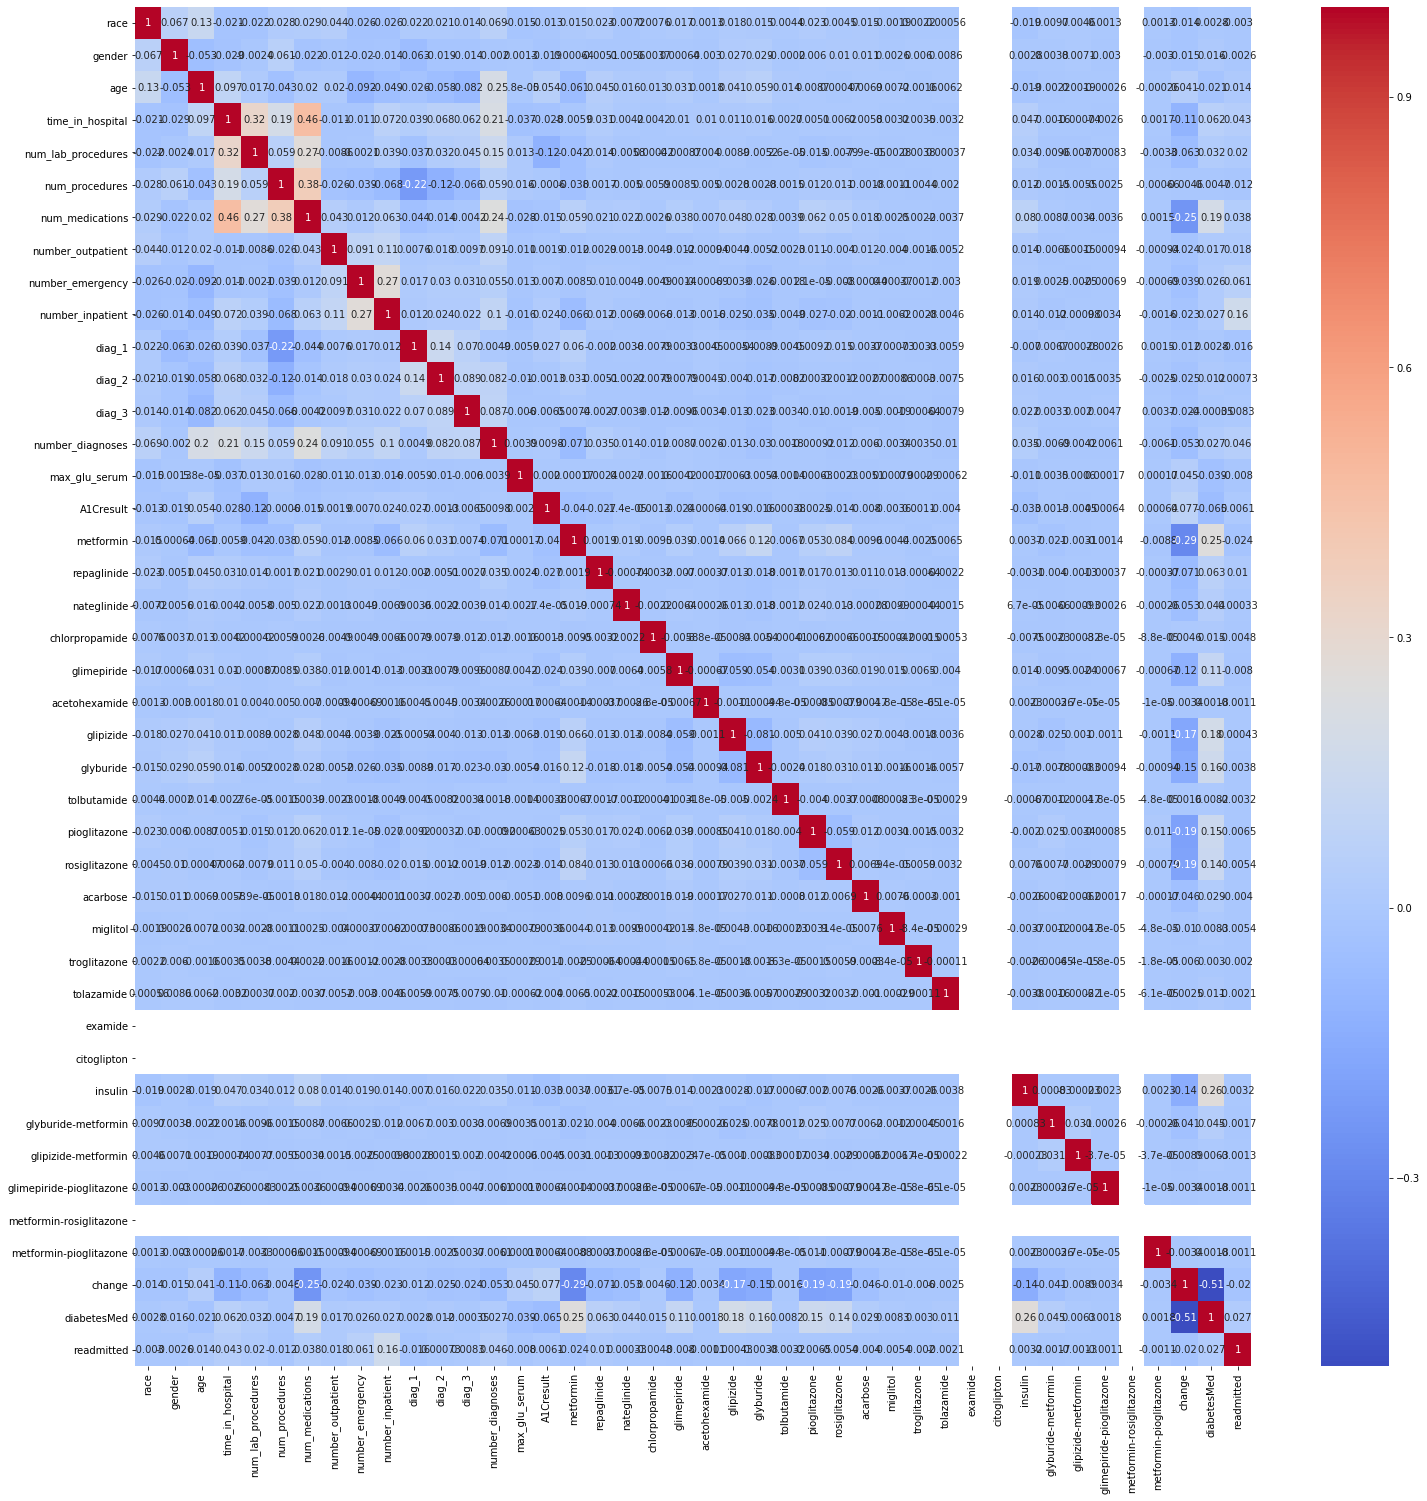

In [98]:
plt.figure(figsize=(25,25))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')
plt.show()

- removing the below columns since they have only zero values and doesnt contribute much in the analysis

In [99]:
df1.drop(['examide','citoglipton','metformin-rosiglitazone'],1,inplace=True)

In [100]:
df1.to_csv('labelencoded.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

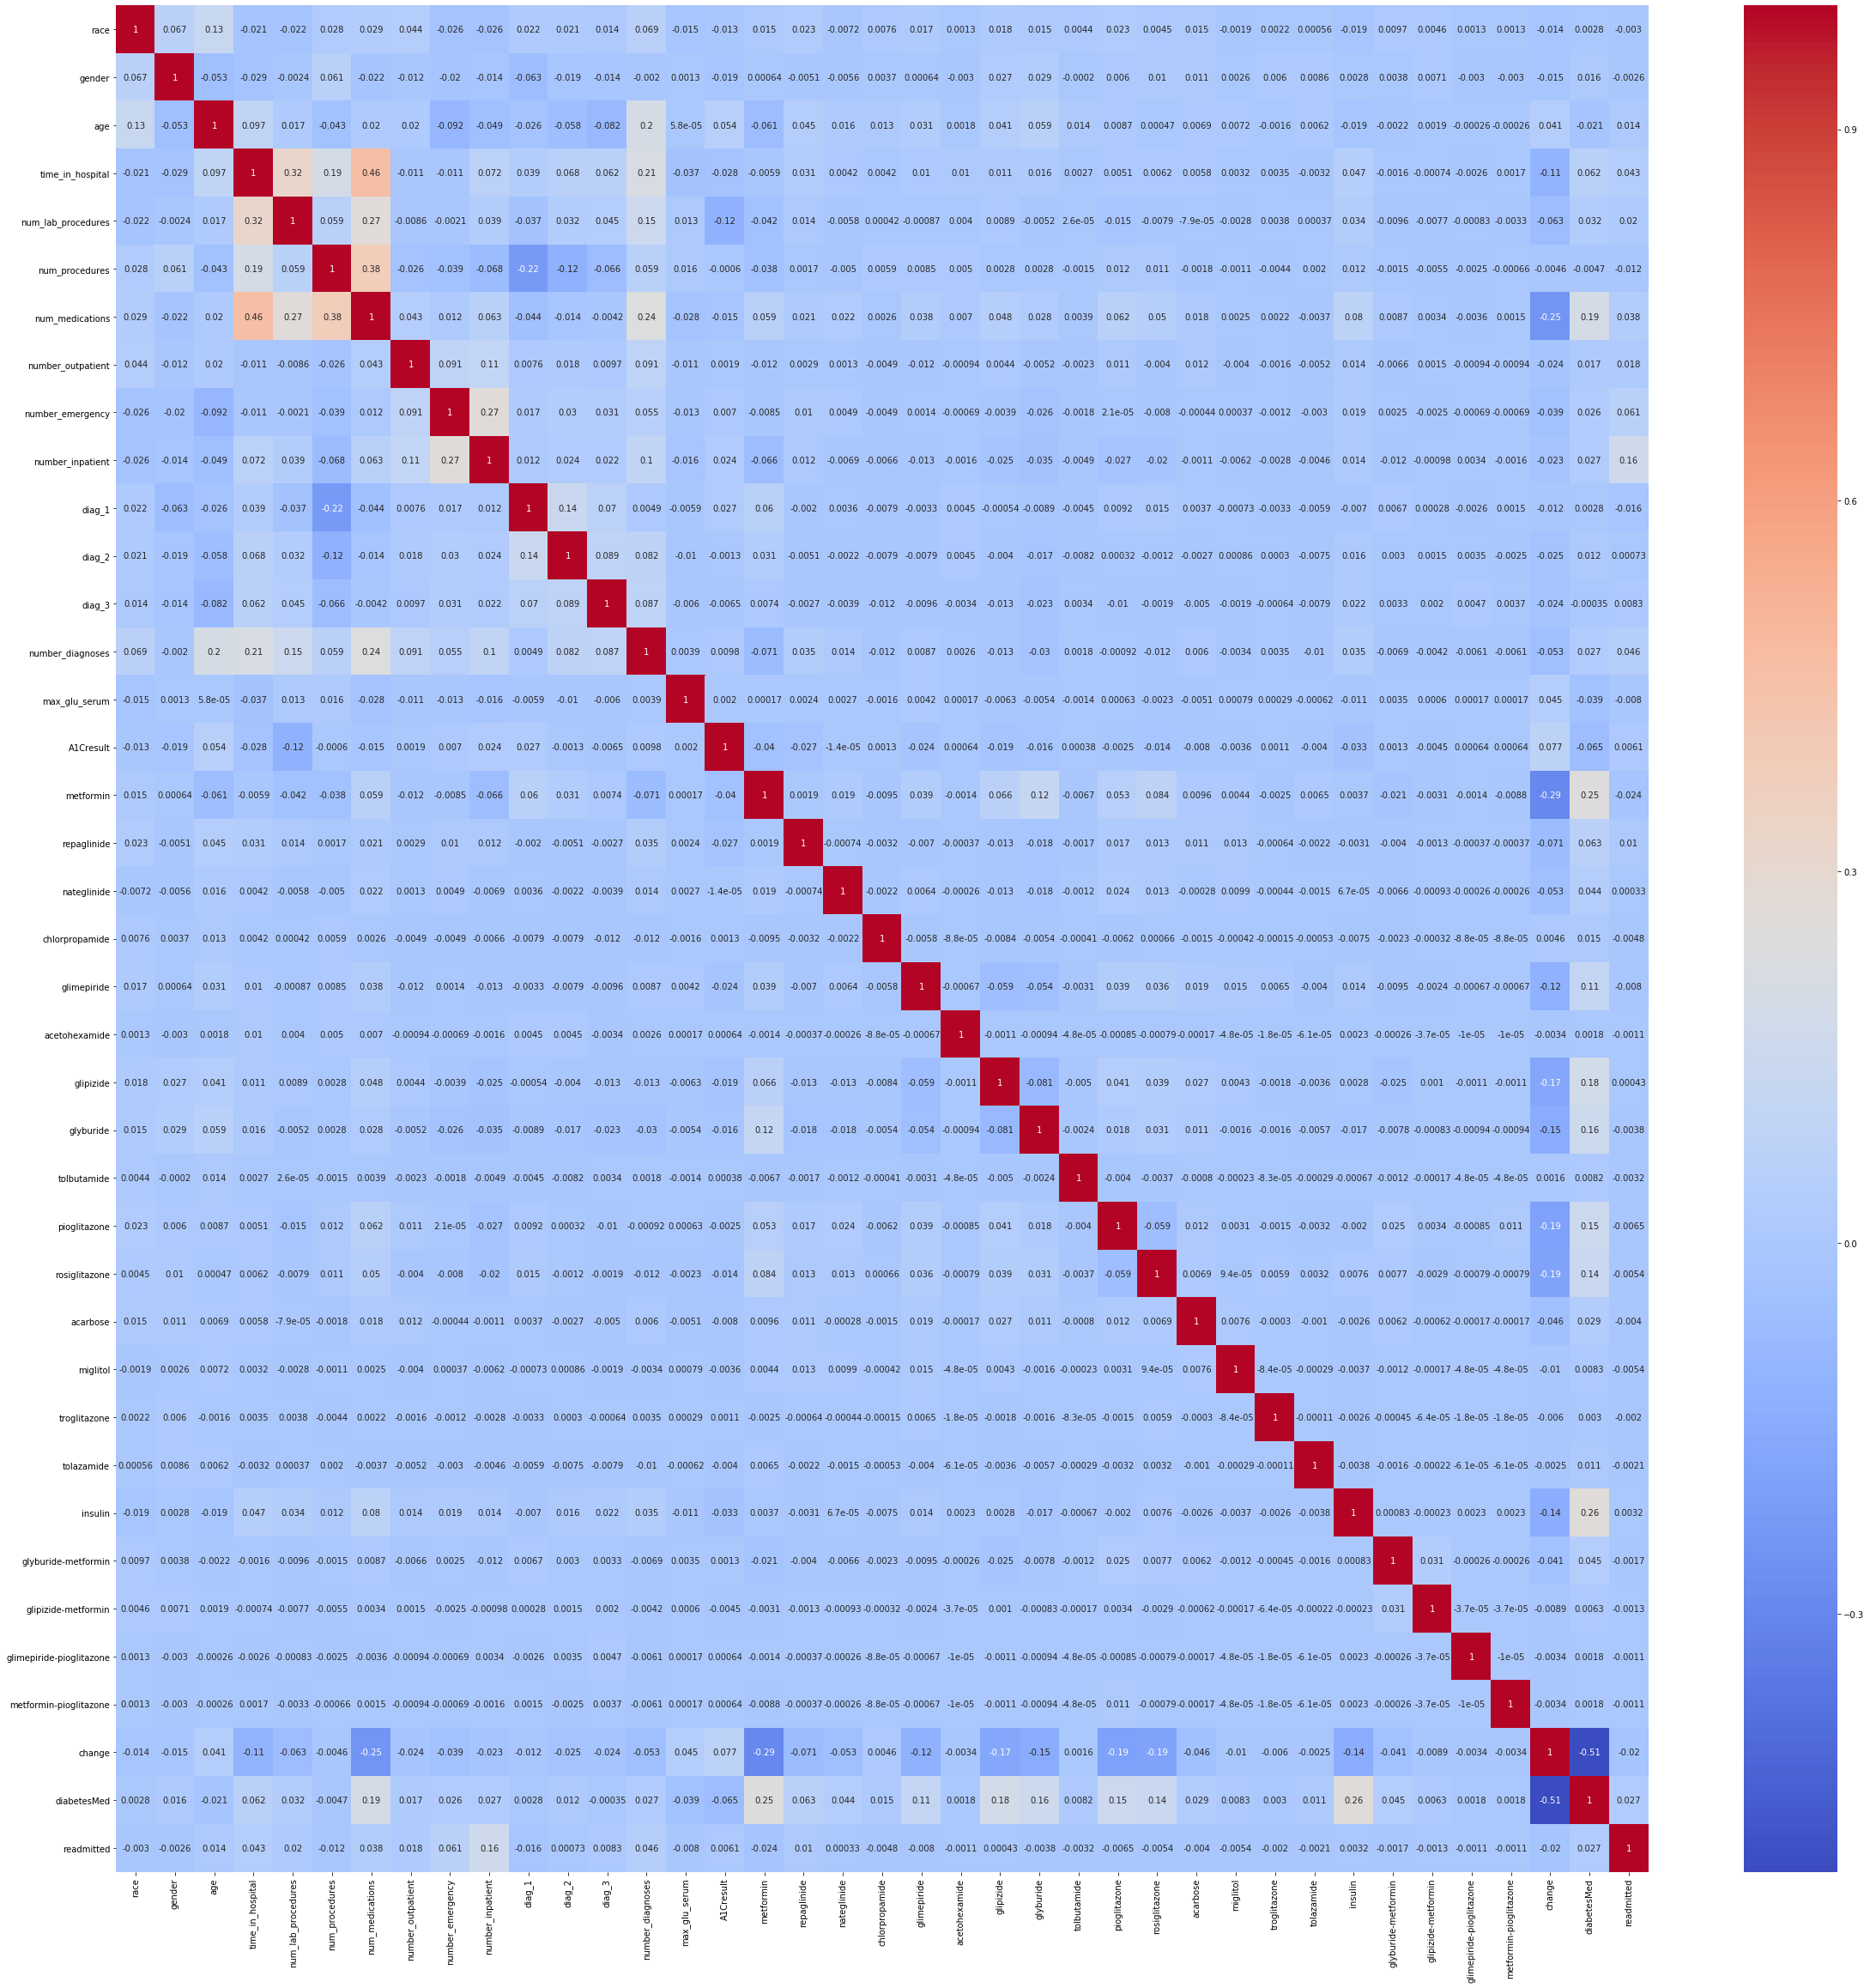

In [105]:
plt.figure(figsize=(40,40))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')
plt.show()

In [ ]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]
    
df['numchange'].value_counts()`

In [7]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

In [33]:
df=pd.read_csv('labelencoded.csv')

<IPython.core.display.Javascript object>

In [2]:
df.head()

,Unnamed: 0,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,2,0,10,3,59,0,18,0,0,...,0,0,3,1,0,0,0,0,1,0
1,2,0,0,20,2,11,5,13,2,0,...,0,0,1,1,0,0,0,1,1,0
2,3,2,1,30,2,44,1,16,0,0,...,0,0,3,1,0,0,0,0,1,0
3,4,2,1,40,1,51,0,8,0,0,...,0,0,2,1,0,0,0,0,1,0
4,5,2,1,50,3,31,6,16,0,0,...,0,0,2,1,0,0,0,1,1,0


In [3]:
pd.options.display.max_columns=None

<IPython.core.display.Javascript object>

In [34]:
df.drop('Unnamed: 0',1,inplace=True)

In [5]:
df.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2,0,10,3,59,0,18,0,0,0,7,1,7,9,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,3,1,0,0,0,0,1,0
1,0,0,20,2,11,5,13,2,0,1,7,1,7,6,2,2,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,1,1,0,0,0,1,1,0
2,2,1,30,2,44,1,16,0,0,0,7,1,0,7,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,3,1,0,0,0,0,1,0
3,2,1,40,1,51,0,8,0,0,0,6,6,1,5,2,2,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,2,1,0,0,0,0,1,0
4,2,1,50,3,31,6,16,0,0,0,0,0,1,9,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,2,1,0,0,0,1,1,0


In [35]:
df.drop(keys,1,inplace=True)

In [10]:
df1=pd.read_csv('diabetic_data.csv')

<IPython.core.display.Javascript object>

In [36]:
df2=df1[keys]

In [15]:
df2.columns

Index(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'insulin',
       'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone',
       'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone',
       'tolbutamide', 'acetohexamide', 'metformintemp', 'repaglinidetemp',
       'nateglinidetemp', 'chlorpropamidetemp', 'glimepiridetemp',
       'glipizidetemp', 'glyburidetemp', 'pioglitazonetemp',
       'rosiglitazonetemp', 'acarbosetemp', 'miglitoltemp', 'insulintemp',
       'glyburide-metformintemp', 'tolazamidetemp',
       'metformin-pioglitazonetemp'],
      dtype='object')

#### - Adding a new columns which defines the number of the medication changes done to the particular patient which might give us some valuable information

In [37]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df2[colname] = df2[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df2['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df2['numchange'] = df2['numchange'] + df2[colname]
    del df2[colname]
    
df2['numchange'].value_counts()

0    74063
1    26272
2     1318
3      108
4        5
Name: numchange, dtype: int64

In [17]:
df2.head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,insulin,glyburide-metformin,tolazamide,metformin-pioglitazone,glimepiride-pioglitazone,glipizide-metformin,troglitazone,tolbutamide,acetohexamide,numchange
0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
1,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,No,No,No,1
2,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
3,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,No,No,No,1
4,No,No,No,No,No,Steady,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,0


#### - encoding all the medicine related columns in the data

In [38]:
for col in keys:
    df2[col] = df2[col].replace('No', 0)
    df2[col] = df2[col].replace('Steady', 1)
    df2[col] = df2[col].replace('Up', 1)
    df2[col] = df2[col].replace('Down', 1)

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
df2.head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,insulin,glyburide-metformin,tolazamide,metformin-pioglitazone,glimepiride-pioglitazone,glipizide-metformin,troglitazone,tolbutamide,acetohexamide,numchange
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [41]:
df.shape

(98053, 19)

In [42]:
df2.shape

(101766, 21)

In [43]:
df=pd.concat([df,df2],1)


<IPython.core.display.Javascript object>

In [44]:
df.dropna(inplace=True)

In [45]:
df.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,insulin,glyburide-metformin,tolazamide,metformin-pioglitazone,glimepiride-pioglitazone,glipizide-metformin,troglitazone,tolbutamide,acetohexamide,numchange
0,2.0,0.0,10.0,3.0,59.0,0.0,18.0,0.0,0.0,0.0,7.0,1.0,7.0,9.0,2.0,2.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,20.0,2.0,11.0,5.0,13.0,2.0,0.0,1.0,7.0,1.0,7.0,6.0,2.0,2.0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,2.0,1.0,30.0,2.0,44.0,1.0,16.0,0.0,0.0,0.0,7.0,1.0,0.0,7.0,2.0,2.0,0.0,1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,1.0,40.0,1.0,51.0,0.0,8.0,0.0,0.0,0.0,6.0,6.0,1.0,5.0,2.0,2.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,2.0,1.0,50.0,3.0,31.0,6.0,16.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,2.0,2.0,1.0,1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [46]:
df.isnull().sum()

race                        0
gender                      0
age                         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
change                      0
diabetesMed                 0
readmitted                  0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
glipizide                   0
glyburide                   0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
insulin                     0
glyburide-metformin         0
tolazamide                  0
metformin-

In [47]:
df.shape

(98053, 40)

In [48]:
df['patient_nbr']=df1['patient_nbr']

#### - checking for the duplicate patient record in the data and removing them and keeping the first occurence of each record in the record to avoid duplicacy

In [49]:
df = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df.shape

(69356, 41)

In [50]:
df.drop('patient_nbr',1,inplace=True)

In [51]:
df.shape

(69356, 40)

In [53]:
df.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,insulin,glyburide-metformin,tolazamide,metformin-pioglitazone,glimepiride-pioglitazone,glipizide-metformin,troglitazone,tolbutamide,acetohexamide,numchange
0,2.0,0.0,10.0,3.0,59.0,0.0,18.0,0.0,0.0,0.0,7.0,1.0,7.0,9.0,2.0,2.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,20.0,2.0,11.0,5.0,13.0,2.0,0.0,1.0,7.0,1.0,7.0,6.0,2.0,2.0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,2.0,1.0,30.0,2.0,44.0,1.0,16.0,0.0,0.0,0.0,7.0,1.0,0.0,7.0,2.0,2.0,0.0,1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,1.0,40.0,1.0,51.0,0.0,8.0,0.0,0.0,0.0,6.0,6.0,1.0,5.0,2.0,2.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,2.0,1.0,50.0,3.0,31.0,6.0,16.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,2.0,2.0,1.0,1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


#### - feature engineering to find the number of medications given to the particular patients during the period of the hospital admission

In [54]:
df['nummed'] = 0

for col in keys:
    df['nummed'] = df['nummed'] + df[col]
df['nummed'].value_counts()

1    30952
0    16716
2    15125
3     5531
4      980
5       48
6        4
Name: nummed, dtype: int64

In [58]:
num_col=[
 'number_outpatient',
 'num_procedures',
 'num_medications',
 'number_emergency',
 'time_in_hospital',
 'number_inpatient',
 'num_lab_procedures',
 'number_diagnoses',
 'numchange']

#### - now lets check for the skewness in the above numerical data if these features are skewed we need to transform them to reduce the skewness in the features 

In [59]:
statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = df[i].skew()
    skew_before.append(skewval)
    
    kurtval = df[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = df[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')
        
        if len(df[df[i] == 0])/len(df) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)
            
            kurtvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)
        
            kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
    else:
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,number_outpatient,9.020049,159.852536,1.237929,Yes,log1p,2.745254,7.857130,0.424964
1,num_procedures,1.303751,0.828622,1.703738,No,NA,1.303751,0.828622,1.703738
2,num_medications,1.339454,3.492844,8.099251,No,NA,1.339454,3.492844,8.099251
3,number_emergency,23.211821,1229.437440,0.943295,Yes,log1p,3.638127,16.107929,0.316762
4,time_in_hospital,1.122558,0.804919,3.003335,No,NA,1.122558,0.804919,3.003335
5,number_inpatient,3.531167,19.694138,1.269272,Yes,log1p,1.420821,1.291102,0.514048
6,num_lab_procedures,-0.225378,-0.237579,19.676545,No,NA,-0.225378,-0.237579,19.676545
7,number_diagnoses,-0.787952,-0.456491,1.846183,No,NA,-0.787952,-0.456491,1.846183
8,numchange,1.608837,2.093871,0.475253,No,NA,1.608837,2.093871,0.475253


##### - from the above dataframe we can see that the features number_outpatient,number_emergency and number_inpatient needs to be transformed since the threshold values is more than 2

In [61]:
# performing the log transformation for the columns determined to be needing it above.

for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])
        
        if statdataframe['log_type'][i] == 'log':
            df = df[df[colname] > 0]
            df[colname + "_log"] = np.log(df[colname])
            
        elif statdataframe['log_type'][i] == 'log1p':
            df = df[df[colname] >= 0]
            df[colname + "_log1p"] = np.log1p(df[colname])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency'], axis = 1)

In [63]:
df.shape

(69356, 41)

In [66]:
df.to_csv('editeddata.csv')

- taking all the numeric columns in one variable

In [67]:
numerics=['num_procedures','num_medications','time_in_hospital','number_inpatient_log1p','num_lab_procedures','number_diagnoses','number_emergency_log1p',
'numchange','number_outpatient_log1p']

In [68]:
df.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'change',
       'diabetesMed', 'readmitted', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin',
       'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone',
       'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone',
       'tolbutamide', 'acetohexamide', 'numchange', 'nummed',
       'number_outpatient_log1p', 'number_emergency_log1p',
       'number_inpatient_log1p'],
      dtype='object')

### - lets add some interaction variables to the data

In [69]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

In [70]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df[name] = df[inter[0]] * df[inter[1]]

In [71]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [72]:
df1=df.copy(deep=True)

In [76]:
df1[numerics] = standardize(df1[numerics])
from scipy.stats import zscore
df1 = df1[(np.abs(zscore(df1[numerics])) < 3).all(axis=1)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
df1.shape

(62344, 50)

In [78]:
df1.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'change',
       'diabetesMed', 'readmitted', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin',
       'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone',
       'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone',
       'tolbutamide', 'acetohexamide', 'numchange', 'nummed',
       'number_outpatient_log1p', 'number_emergency_log1p',
       'number_inpatient_log1p', 'num_medications|time_in_hospital',
       'num_medications|num_procedures', 'time_in_hospital|num_lab_procedures',
       'num_medications|num_lab_procedures',
       'num_medications|number_diagnoses', 'age|number_diagnoses',
       'change|num_medications', 'numb

In [80]:
df1.drop(['diag_2','diag_3'],1,inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

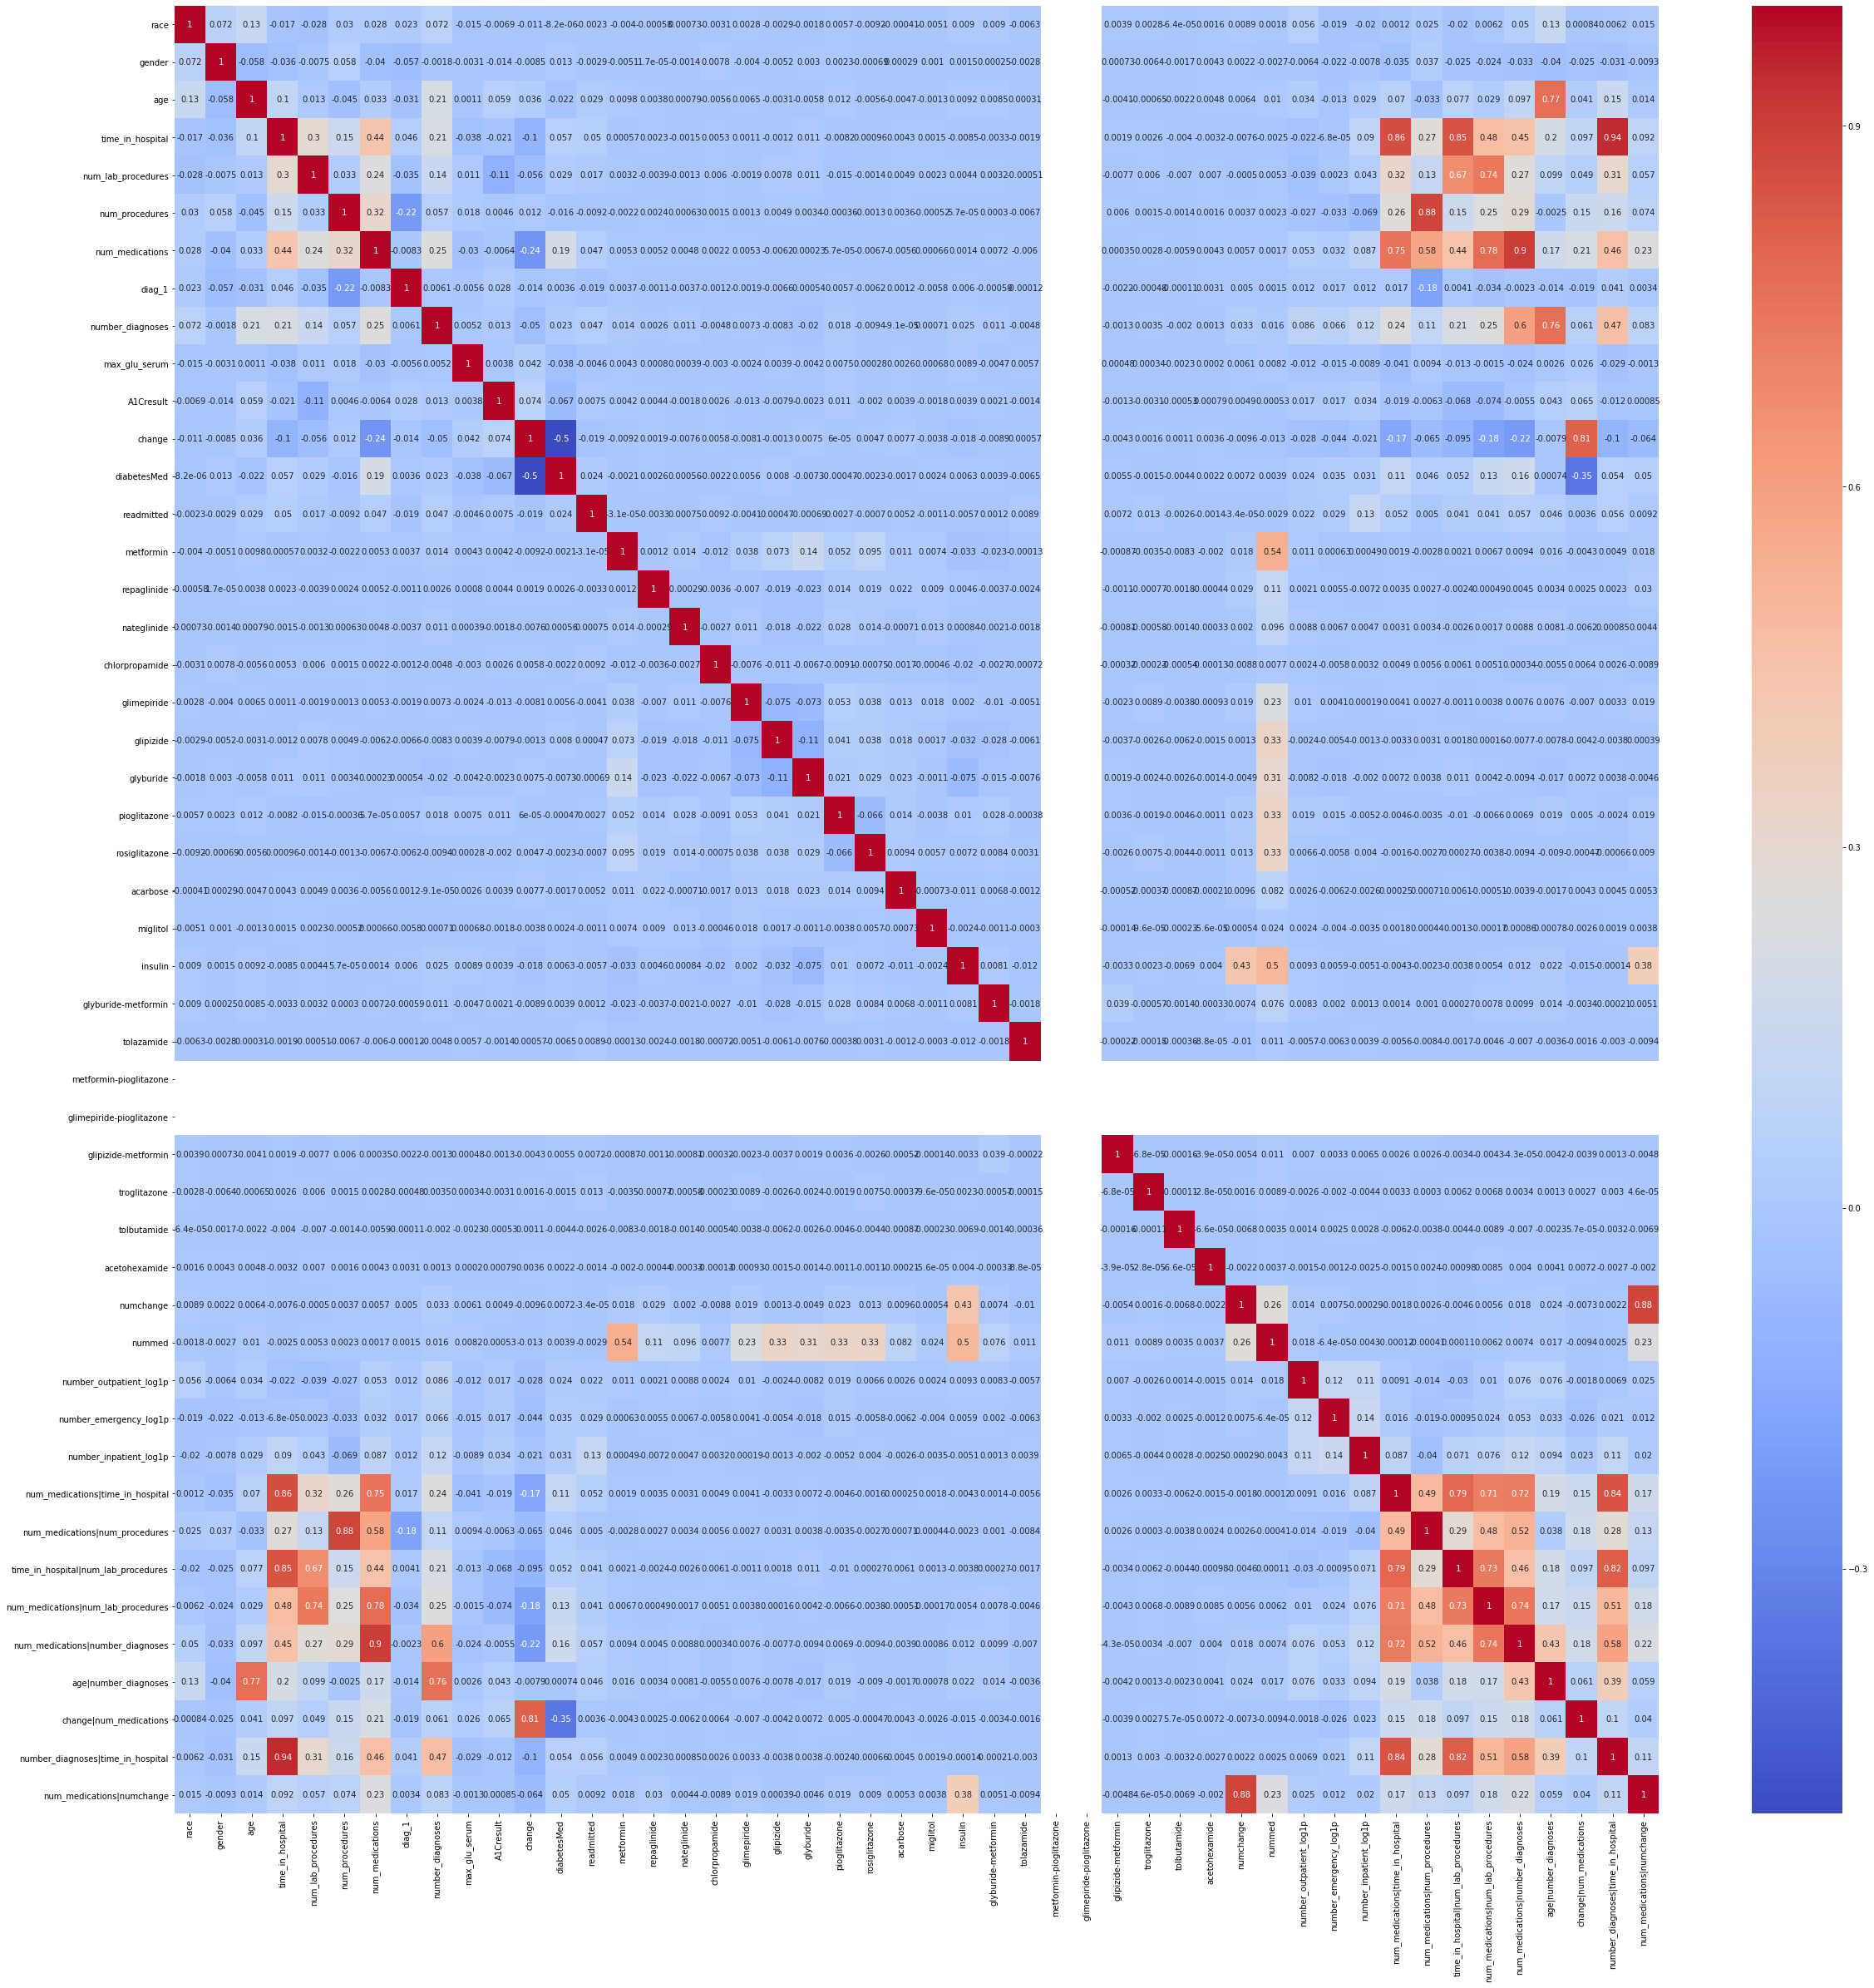

In [83]:
plt.figure(figsize=(40,40))
sns.heatmap(df1.corr(method='pearson'),annot=True,cmap='coolwarm')
plt.show()

In [84]:
df1.corr()['readmitted']

race                                  -0.002314
gender                                -0.002867
age                                    0.029117
time_in_hospital                       0.049654
num_lab_procedures                     0.016939
num_procedures                        -0.009168
num_medications                        0.046847
diag_1                                -0.018884
number_diagnoses                       0.046997
max_glu_serum                         -0.004615
A1Cresult                              0.007504
change                                -0.018540
diabetesMed                            0.023603
readmitted                             1.000000
metformin                             -0.000031
repaglinide                           -0.003271
nateglinide                            0.000746
chlorpropamide                         0.009193
glimepiride                           -0.004098
glipizide                              0.000473
glyburide                             -0

In [86]:
df1.drop(['metformin-pioglitazone',                   
'glimepiride-pioglitazone'],1,inplace=True)

In [87]:
df1.shape

(62344, 46)

In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62344 entries, 0 to 98052
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   race                                 62344 non-null  float64
 1   gender                               62344 non-null  float64
 2   age                                  62344 non-null  float64
 3   time_in_hospital                     62344 non-null  float64
 4   num_lab_procedures                   62344 non-null  float64
 5   num_procedures                       62344 non-null  float64
 6   num_medications                      62344 non-null  float64
 7   diag_1                               62344 non-null  float64
 8   number_diagnoses                     62344 non-null  float64
 9   max_glu_serum                        62344 non-null  float64
 10  A1Cresult                            62344 non-null  float64
 11  change                      

In [90]:
df1.to_csv('Final_data_01.csv')

In [1]:
df=pd.read_csv('Final_data_01.csv')

<IPython.core.display.Javascript object>

In [2]:
from sklearn.feature_selection import SelectKBest

In [4]:
y=df['readmitted']
x=df.drop('readmitted',1)

In [5]:
x.head()

,Unnamed: 0,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,number_diagnoses,...,number_inpatient_log1p,num_medications|time_in_hospital,num_medications|num_procedures,time_in_hospital|num_lab_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,age|number_diagnoses,change|num_medications,number_diagnoses|time_in_hospital,num_medications|numchange
0,0,2.0,0.0,10.0,-0.476923,0.808695,-0.791927,0.242707,7.0,0.830182,...,-0.643839,54.0,0.0,177.0,1062.0,162.0,90.0,0.0,27.0,0.0
1,1,0.0,0.0,20.0,-0.809889,-1.630775,2.142817,-0.374639,7.0,-0.794804,...,0.704579,26.0,65.0,22.0,143.0,78.0,120.0,13.0,12.0,13.0
2,2,2.0,1.0,30.0,-0.809889,0.046360,-0.204979,-0.004232,7.0,-0.253142,...,-0.643839,32.0,16.0,88.0,704.0,112.0,210.0,0.0,14.0,0.0
3,3,2.0,1.0,40.0,-1.142854,0.402117,-0.791927,-0.991984,6.0,-1.336466,...,-0.643839,8.0,0.0,51.0,408.0,40.0,200.0,0.0,5.0,8.0
4,4,2.0,1.0,50.0,-0.476923,-0.614329,2.729766,-0.004232,0.0,0.830182,...,-0.643839,48.0,96.0,93.0,496.0,144.0,450.0,16.0,27.0,0.0


In [6]:
x.drop('Unnamed: 0',1,inplace=True)

In [11]:
selector=SelectKBest(k=20)

In [12]:
selector.fit(x,y)

SelectKBest(k=20, score_func=<function f_classif at 0x000002A0413C0598>)

In [14]:
selector.get_params()

{'k': 20,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

In [46]:
pd.DataFrame({'features':x.columns,'p_values':selector.pvalues_})

<IPython.core.display.Javascript object>

,features,p_values
0,race,5.634903e-01
1,gender,4.740994e-01
2,age,3.553246e-13
3,time_in_hospital,2.440785e-35
4,num_lab_procedures,2.340544e-05
5,num_procedures,2.206631e-02
6,num_medications,1.225728e-31
7,diag_1,2.411577e-06
8,number_diagnoses,7.872876e-32
9,max_glu_serum,2.492122e-01


In [48]:
pd.DataFrame({'features':x.columns,'p_values':pd.Series(-np.log10(selector.pvalues_))})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,features,p_values
0,race,0.249114
1,gender,0.324131
2,age,12.449375
3,time_in_hospital,34.612471
4,num_lab_procedures,4.630683
5,num_procedures,1.656270
6,num_medications,30.911606
7,diag_1,5.617699
8,number_diagnoses,31.103867
9,max_glu_serum,0.603431


In [38]:
features=pd.DataFrame({'features':x.columns,'p_values':pd.Series(-np.log10(selector.pvalues_))}).sort_values(by='p_values',ascending=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
features

,features,p_values
35,number_inpatient_log1p,227.391940
40,num_medications|number_diagnoses,45.610459
43,number_diagnoses|time_in_hospital,43.391019
36,num_medications|time_in_hospital,38.542517
3,time_in_hospital,34.612471
8,number_diagnoses,31.103867
6,num_medications,30.911606
41,age|number_diagnoses,29.798660
38,time_in_hospital|num_lab_procedures,24.038977
39,num_medications|num_lab_procedures,23.642728


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

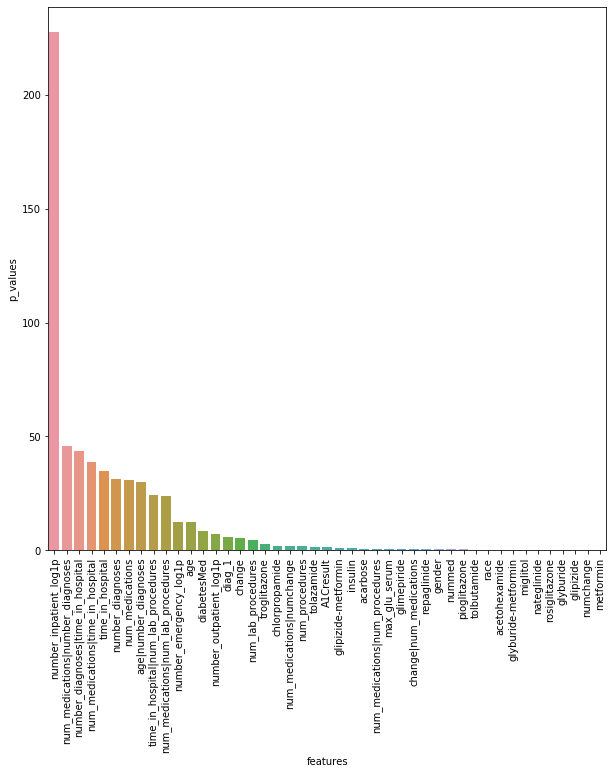

In [44]:
plt.figure(figsize=(10,10))
sns.barplot(x='features',y='p_values',data=features)
plt.xticks(rotation=90)
plt.show()

In [49]:
selector1=SelectKBest()

In [50]:
selector1.fit(x,y)

SelectKBest(k=10, score_func=<function f_classif at 0x000002A0413C0598>)

In [54]:
-np.log10(selector1.pvalues_)

<IPython.core.display.Javascript object>

array([2.49113535e-01, 3.24130554e-01, 1.24493747e+01, 3.46124706e+01,
       4.63068313e+00, 1.65627033e+00, 3.09116059e+01, 5.61769881e+00,
       3.11038666e+01, 6.03430677e-01, 1.21478033e+00, 5.43567394e+00,
       8.42398346e+00, 2.65397739e-03, 3.82864125e-01, 6.93937415e-02,
       1.66324278e+00, 5.14026880e-01, 4.28343292e-02, 6.35390812e-02,
       3.06537112e-01, 6.45109735e-02, 7.19040825e-01, 1.03169663e-01,
       8.19732078e-01, 1.19628627e-01, 1.59062290e+00, 1.13316498e+00,
       2.75850888e+00, 2.85325267e-01, 1.37370830e-01, 2.93401768e-03,
       3.23572160e-01, 7.13674683e+00, 1.24862236e+01, 2.27391940e+02,
       3.85425174e+01, 6.81798365e-01, 2.40389770e+01, 2.36427283e+01,
       4.56104592e+01, 2.97986597e+01, 4.32390546e-01, 4.33910195e+01,
       1.66062278e+00])